## Project Overview
- Your goal for this project is to fetch all securties in each index that propose a gain today. 
- Not only will you fetch these you will sort the returns as wells a find the securites that are of penny value (we wil lconsider all stocks under 5 dollars a penny stock
- In the current status of economy and Covid 19 one may wonder what a perfect portfolio would look like. Find and optimize a poortfolio that would have generated a satisfying return during the Covid 19 pandemic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas_datareader import data as web

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


### Nasdaq
- Importing tickers for the Nasdaq
- 103 companies listed

In [2]:
nasdaq = pd.read_excel("resources/nasdaq_100_stocks.xlsx")

In [3]:
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ticker             103 non-null    object 
 1   Name               103 non-null    object 
 2   Price              103 non-null    float64
 3   Dividend Yield     56 non-null     float64
 4   Market Cap ($M)    102 non-null    float64
 5   Forward P/E Ratio  102 non-null    float64
 6   Payout Ratio       56 non-null     float64
 7   Beta               102 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.6+ KB


### Visualizations
 - There is one company with a dividend yield above 5% and a few 4% and above 
 - lets find these companies

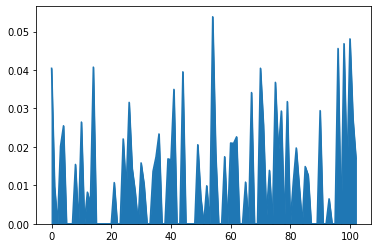

In [4]:
nasdaq["Dividend Yield"].plot(kind = "area")

In [5]:
nasdaq.set_index("Ticker")[["Dividend Yield", "Name"]].sort_values("Dividend Yield",ascending = False).head(10)

Dividend Yield                            Name
Ticker                                                
KHC           0.053854             The Kraft Heinz Co.
WYNN          0.048106               Wynn Resorts Ltd.
WDC           0.046849           Western Digital Corp.
WBA           0.045597  Walgreens Boots Alliance, Inc.
AVGO          0.040757                  Broadcom, Inc.
NTAP          0.040466                    NetApp, Inc.
AAL           0.040445   American Airlines Group, Inc.
HAS           0.039535                    Hasbro, Inc.
PAYX          0.036795                   Paychex, Inc.
GILD          0.034966           Gilead Sciences, Inc.

### Below are the top 10 Dividend  Yielding companies in the Nasdaq

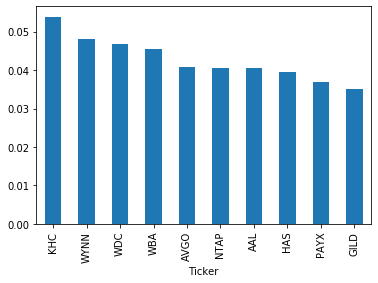

In [6]:
nasdaq.set_index("Ticker")["Dividend Yield"].sort_values(ascending = False).head(10).plot(kind = "bar")

### Fetch Adjustable close for all securities in the nasdaq
- Will fetch this form the yahoo finance library 

In [7]:
nasd_tickers = list(nasdaq["Ticker"])

In [8]:
nasdaq_adj_Close = pd.DataFrame()

In [9]:
passed = []
failed = []
for x in nasd_tickers:
    try:
        nasdaq_adj_Close[x] = web.DataReader(x, data_source="yahoo", start = "2020-1-1")["Adj Close"]
        passed.append(x)
    except(IOError, KeyError):
        failed.append(x)

### Checking for missing Data
- Will drop if Null,but appear there is no data missing below

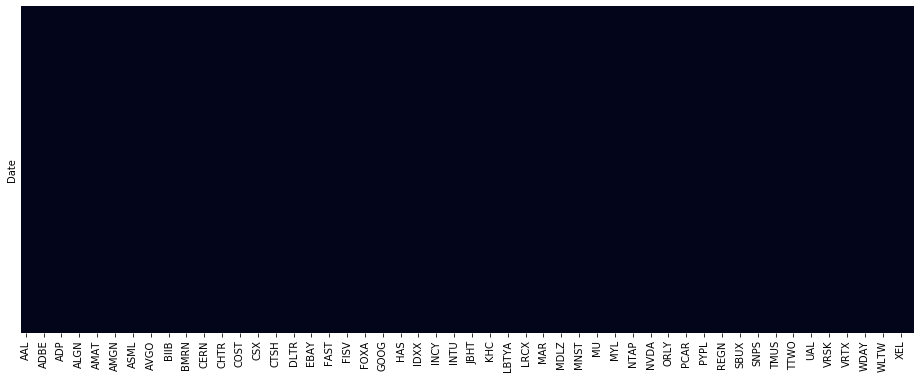

In [10]:
plt.figure(figsize=(16,6))
sns.heatmap(nasdaq_adj_Close.isnull(), yticklabels=False, cbar=False)

## Checking Coorelation 

In [11]:
nasdaq_adj_Close.corr()

AAL      AAPL      ADBE       ADI       ADP      ADSK      ALGN  \
AAL   1.000000 -0.146722 -0.226752  0.318518  0.886752 -0.027407  0.289170   
AAPL -0.146722  1.000000  0.949773  0.655296 -0.040203  0.871766  0.792857   
ADBE -0.226752  0.949773  1.000000  0.714350 -0.049562  0.939258  0.774609   
ADI   0.318518  0.655296  0.714350  1.000000  0.532326  0.861853  0.880192   
ADP   0.886752 -0.040203 -0.049562  0.532326  1.000000  0.171095  0.436383   
...        ...       ...       ...       ...       ...       ...       ...   
WDC   0.921874 -0.265646 -0.300043  0.308885  0.925564 -0.087382  0.237443   
WLTW  0.419801  0.524021  0.529940  0.774489  0.635073  0.655237  0.800655   
WYNN  0.921848 -0.025419 -0.101609  0.492562  0.913797  0.099094  0.431291   
XEL   0.270462  0.628222  0.555857  0.569925  0.416921  0.605318  0.661189   
XLNX  0.049260  0.821685  0.793679  0.784223  0.182521  0.839311  0.884000   

          ALXN      AMAT       AMD  ...      VRSK      VRSN      VRTX  \
AAL   0.138169  0.412450 -0.251829  ...  0.002902  0.128669 -0.543672   
AAPL  0.454392  0.717488  0.906332  ...  0.906889  0.473160  0.581618   
ADBE  0.550335  0.706304  0.812237  ...  0.894615  0.511278  0.735460   
ADI   0.820473  0.894599  0.453224  ...  0.767125  0.731707  0.516837   
ADP   0.390793  0.574171 -0.197781  ...  0.199448  0.425114 -0.222971   
...        ...       ...       ...  ...       ...       ...       ...   
WDC   0.200914  0.388111 -0.352469  ... -0.035176  0.253079 -0.440935   
WLTW  0.592468  0.856315  0.388386  ...  0.727196  0.737272  0.369785   
WYNN  0.353178  0.535601 -0.131812  ...  0.133624  0.385850 -0.347935   
XEL   0.318430  0.745288  0.618631  ...  0.786304  0.475774  0.218187   
XLNX  0.688371  0.803448  0.749474  ...  0.839849  0.637364  0.548030   

           WBA      WDAY       WDC      WLTW      WYNN       XEL      XLNX  
AAL   0.882998  0.328778  0.921874  0.419801  0.921848  0.270462  0.049260  
AAPL -0.405750  0.772579 -0.265646  0.524021 -0.025419  0.628222  0.821685  
ADBE -0.492143  0.800358 -0.300043  0.529940 -0.101609  0.555857  0.793679  
ADI   0.066019  0.861215  0.308885  0.774489  0.492562  0.569925  0.784223  
ADP   0.742190  0.489460  0.925564  0.635073  0.913797  0.416921  0.182521  
...        ...       ...       ...       ...       ...       ...       ...  
WDC   0.844804  0.279721  1.000000  0.491720  0.917089  0.210346  0.015518  
WLTW  0.173074  0.799606  0.491720  1.000000  0.582264  0.639632  0.633255  
WYNN  0.789969  0.453000  0.917089  0.582264  1.000000  0.302370  0.212244  
XEL   0.075828  0.634537  0.210346  0.639632  0.302370  1.000000  0.572898  
XLNX -0.136634  0.737731  0.015518  0.633255  0.212244  0.572898  1.000000  

[100 rows x 100 columns]

## Checking returns for each Security 
- we will look the most recent date(Todays Data) 

In [12]:
todays_date = nasdaq_adj_Close.iloc[-1:].iloc[0].name

In [13]:
nasdaq_adj_Close.pct_change().iloc[-1:].transpose().sort_values(todays_date, ascending = False).head(10)

Date  2020-09-02
LRCX    0.065011
ALGN    0.062207
AMAT    0.051543
ILMN    0.047982
SWKS    0.046634
MU      0.045236
XEL     0.043764
AVGO    0.043027
WDC     0.040707
GOOG    0.040687

Text(0, 0.5, 'Returns')

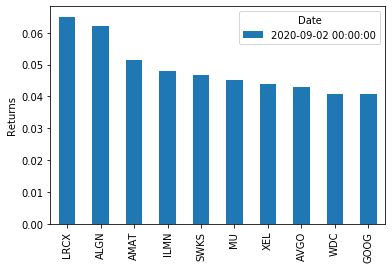

In [14]:
nasdaq_adj_Close.pct_change().iloc[-1:].transpose().sort_values(todays_date, ascending = False).head(10).plot(kind = "bar")
plt.ylabel("Returns")

## Nasdaq Volatility 
- Lets look at the volatility of each security year to date

In [15]:
nas_returns = nasdaq_adj_Close.pct_change()

In [16]:
nas_returns

AAL      AAPL      ADBE       ADI       ADP      ADSK  \
Date                                                                     
2020-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-03 -0.049502 -0.009722 -0.007834 -0.017604 -0.002114 -0.015333   
2020-01-06 -0.011935  0.007968  0.005726 -0.011749  0.001353  0.011733   
2020-01-07 -0.003660 -0.004703 -0.000959  0.022751 -0.012104  0.002031   
2020-01-08  0.022777  0.016086  0.013438  0.009032  0.009397  0.013067   
...              ...       ...       ...       ...       ...       ...   
2020-08-27  0.038311 -0.011954 -0.034381 -0.007090  0.010028 -0.020547   
2020-08-28  0.023343 -0.001620  0.011992  0.004536  0.002340  0.017605   
2020-08-31 -0.039735  0.033912 -0.005906 -0.022579 -0.015919 -0.006831   
2020-09-01  0.003831  0.039833  0.028361  0.016085 -0.004026  0.031787   
2020-09-02  0.009924 -0.020718  0.011081  0.025850  0.028514  0.030926   

                ALGN      ALXN      AMAT       AMD  ...      VRSK      VRSN  \
Date                                                ...                       
2020-01-02       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2020-01-03 -0.011421 -0.013260 -0.015916 -0.010183  ...  0.009727  0.021095   
2020-01-06  0.019398  0.001598 -0.021565 -0.004321  ...  0.002294  0.009259   
2020-01-07 -0.009864  0.002533  0.028886 -0.002893  ...  0.008369  0.002318   
2020-01-08  0.010386  0.016191 -0.000649 -0.008705  ...  0.009207  0.004626   
...              ...       ...       ...       ...  ...       ...       ...   
2020-08-27  0.016428  0.017354 -0.027133 -0.025808  ...  0.001073 -0.003069   
2020-08-28 -0.016556  0.008293  0.016766  0.020883  ...  0.003966  0.001299   
2020-08-31 -0.011977  0.067576 -0.023307  0.061601  ... -0.003630  0.031998   
2020-09-01  0.028453 -0.013483  0.004708  0.014975  ...  0.005464  0.004562   
2020-09-02  0.062207  0.010117  0.051543 -0.021263  ...  0.027172  0.018167   

                VRTX       WBA      WDAY       WDC      WLTW      WYNN  \
Date                                                                     
2020-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-03 -0.006699  0.000000  0.005852 -0.015392  0.000245 -0.014833   
2020-01-06  0.027755  0.008632  0.006234 -0.019192  0.001223 -0.001979   
2020-01-07 -0.001071 -0.005034  0.020414  0.067698 -0.002053  0.004745   
2020-01-08  0.032620 -0.058357  0.033304  0.014484  0.001127  0.006274   
...              ...       ...       ...       ...       ...       ...   
2020-08-27  0.011243  0.017326  0.014090  0.027405  0.019795  0.020283   
2020-08-28 -0.015966 -0.014743  0.125791  0.073780  0.000487  0.058137   
2020-08-31  0.033931 -0.019092 -0.017099  0.015328 -0.000632 -0.044784   
2020-09-01 -0.013005 -0.033141  0.008510 -0.028110  0.013818 -0.013379   
2020-09-02  0.023231  0.011153 -0.034209  0.040707  0.037433  0.035350   

                 XEL      XLNX  
Date                            
2020-01-02       NaN       NaN  
2020-01-03  0.004809 -0.023020  
2020-01-06 -0.001436 -0.020844  
2020-01-07 -0.002077  0.022830  
2020-01-08 -0.000961 -0.002815  
...              ...       ...  
2020-08-27  0.007339 -0.012002  
2020-08-28  0.000291  0.011473  
2020-08-31  0.011945 -0.007149  
2020-09-01 -0.013243  0.011041  
2020-09-02  0.043764  0.033710  

[170 rows x 100 columns]

In [17]:
nasdaq_vol = []
for x in nas_returns.columns:
    nasdaq_vol.append(nas_returns[f"{x}"].std() * 252)

In [18]:
nasdaq_vol_df = pd.DataFrame(nasdaq_vol, columns=["volatility"], index=nas_returns.columns)

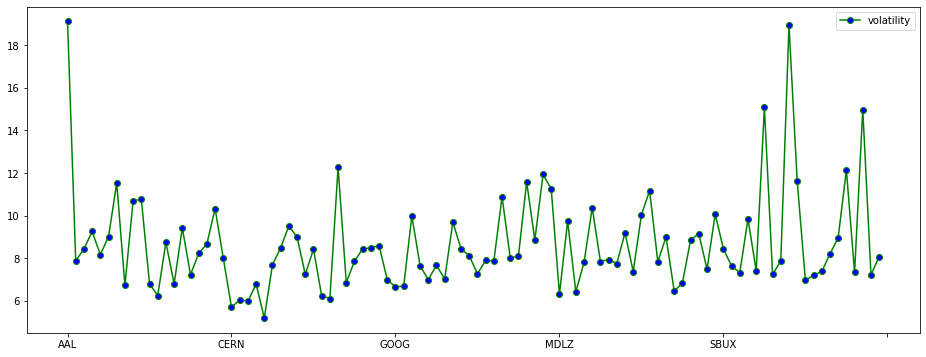

In [19]:
nasdaq_vol_df.plot(figsize = (16,6), c ="g", marker = "o", mfc = "b")

## Sorting Volatility for Nasdaq
- top 10 mose volatile companies in the nasdaq year to date

In [20]:
nasdaq_vol_df.sort_values("volatility", ascending = False).head(10)

volatility
AAL    19.116275
UAL    18.942985
TSLA   15.084609
WYNN   14.976629
EXPE   12.269868
WDC    12.142256
MAR    11.935471
ULTA   11.623720
LRCX   11.588231
ALGN   11.530061

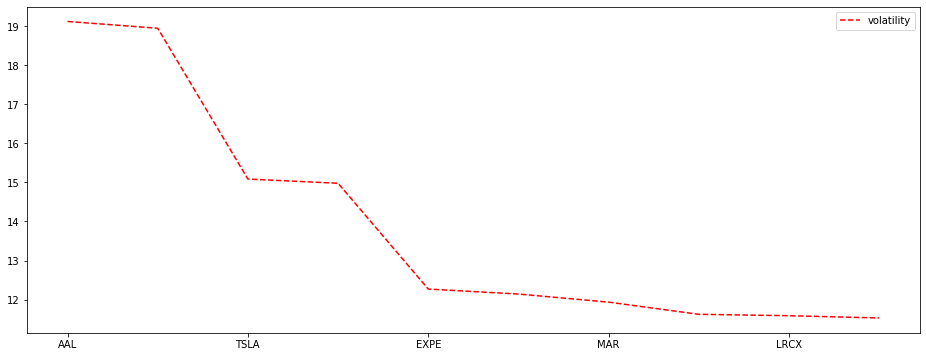

In [21]:
nasdaq_vol_df.sort_values("volatility", ascending = False).head(10).plot(figsize = (16,6), 
                                                                          kind = "line", ls = "--", c= "r" )

### Creating an Optimized Portfolio for Nasdaq
- We are considering Covid 19 and the portfolio that would have yielded the highest return considering risk. 
- THe optimized portfolio should consist of 10 companies
- Creating an efficient frontier using every company in the nasdaq
- This will proivde us with the top weighted companies year today where we will than take the top 10 weighted companies
- Will create 1000 portfolios to get the portfolio containing every company

In [22]:
n_portfolios = 1000
all_weights = np.zeros((n_portfolios, len(passed)))
all_Sharps = np.zeros(n_portfolios)
all_vol = np.zeros(n_portfolios)
all_returns = np.zeros(n_portfolios)

for ind in range(n_portfolios):
    weights = np.array(np.random.random(len(passed)))
    weights = weights/weights.sum()
    all_weights[ind,:] = weights
    
    all_returns[ind] = np.sum(nas_returns.mean() * weights * 252)
    all_vol[ind] = np.sqrt(np.dot(weights.T, np.dot(nas_returns.cov() * 252, weights)))
    all_Sharps[ind] = all_returns[ind]/all_vol[ind]

### Evaluating the portfolio
- Max sharp
- Max returns
- min vol
- again we are fetching the max return(focus) for a portfolio containing 10 companies in 2020

In [23]:
max_sharp = all_Sharps.argmax()

In [24]:
max_returns = all_returns.argmax()

In [25]:
lowest_vol = all_vol.argmin()

### Plot on a scatter plot for visualization
- As you can see the maximum returns for a portfolio containing every company in the Nasdaq would yield avolatility of approzimately 40% and this is non the less not fesiable and unrealistic
- Below we will find the to companies that make up the portfolio relative to weight that produces the max Return

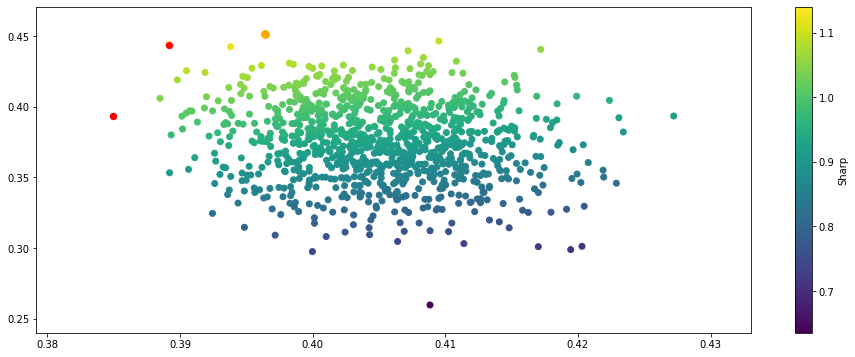

In [26]:
plt.figure(figsize=(16,6))
plt.scatter(all_vol, all_returns, c=all_Sharps)
plt.colorbar(label = "Sharp")
plt.scatter(all_vol[max_sharp], all_returns[max_sharp], c="red", s = 40)
plt.scatter(all_vol[lowest_vol], all_returns[lowest_vol], c="red", s = 40)
plt.scatter(all_vol[max_returns], all_returns[max_returns], c="orange", s = 60)

## Creating Frontier Data frame from created portfolio
- Will use this to get the max return portfolio by weight 
- Will than sort the weights of the max return portfolio to grab the to 10 compaines

In [27]:
frontier_returns = pd.DataFrame(all_returns, columns=["returns"])

In [28]:
frontier_weights = pd.DataFrame(all_weights, columns=passed)

In [29]:
frontier_vol = pd.DataFrame(all_vol, columns=["Vol"])

In [30]:
frontier_sharp = pd.DataFrame(all_Sharps, columns=["Sharp"])

In [31]:
frontier = pd.concat([frontier_returns, frontier_sharp, frontier_vol, frontier_weights], axis=1)

In [32]:
frontier

returns     Sharp       Vol       AAL      AAPL      ADBE       ADI  \
0    0.345898  0.855800  0.404181  0.010463  0.008055  0.012832  0.017177   
1    0.373764  0.918040  0.407133  0.013315  0.007386  0.008633  0.000772   
2    0.397481  0.983028  0.404344  0.009675  0.016426  0.018449  0.000056   
3    0.352563  0.882930  0.399310  0.008416  0.012979  0.013194  0.002128   
4    0.404119  1.002233  0.403219  0.011214  0.005082  0.017259  0.003612   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.361720  0.910278  0.397373  0.006155  0.006621  0.017546  0.012590   
996  0.403463  0.992120  0.406667  0.013541  0.020697  0.004647  0.013257   
997  0.380121  0.943863  0.402729  0.006404  0.005706  0.014922  0.001705   
998  0.359473  0.879980  0.408501  0.015263  0.007299  0.001428  0.016237   
999  0.359928  0.889086  0.404829  0.003648  0.003164  0.010892  0.006061   

          ADP      ADSK      ALGN  ...      VRSK      VRSN      VRTX  \
0    0.009831  0.011539  0.020430  ...  0.009136  0.001032  0.015665   
1    0.016063  0.018161  0.016798  ...  0.006244  0.004027  0.004020   
2    0.009465  0.009097  0.004262  ...  0.012500  0.011660  0.013177   
3    0.009943  0.005542  0.015483  ...  0.018303  0.016642  0.012151   
4    0.011350  0.014150  0.012394  ...  0.008168  0.011422  0.005265   
..        ...       ...       ...  ...       ...       ...       ...   
995  0.006986  0.012281  0.016242  ...  0.017628  0.015040  0.016200   
996  0.013052  0.016749  0.007497  ...  0.014916  0.005651  0.008771   
997  0.008814  0.010855  0.006574  ...  0.009938  0.002996  0.013051   
998  0.002263  0.014815  0.019925  ...  0.012393  0.013748  0.000219   
999  0.002603  0.003434  0.009079  ...  0.004404  0.007101  0.002779   

          WBA      WDAY       WDC      WLTW      WYNN       XEL      XLNX  
0    0.008516  0.009823  0.020649  0.016006  0.018113  0.015047  0.020439  
1    0.009429  0.010289  0.013221  0.013800  0.001450  0.009932  0.004362  
2    0.001652  0.017769  0.008974  0.009119  0.003153  0.017534  0.012996  
3    0.009357  0.013870  0.014913  0.010608  0.016040  0.003703  0.017733  
4    0.016282  0.017143  0.009687  0.018345  0.007214  0.002731  0.007023  
..        ...       ...       ...       ...       ...       ...       ...  
995  0.016510  0.009787  0.006606  0.004172  0.003567  0.009303  0.007214  
996  0.000707  0.005559  0.004232  0.012907  0.020758  0.006836  0.006705  
997  0.003575  0.006721  0.019748  0.015859  0.006201  0.011751  0.019011  
998  0.016116  0.014739  0.002818  0.011208  0.017951  0.006191  0.004830  
999  0.006408  0.000919  0.019263  0.017279  0.009546  0.015916  0.001286  

[1000 rows x 103 columns]

### Finding max return portfolio
- Maximum return for the portfolio containing every company in the Nasdaq is 44%
- We wil ltake the top 10 companies in the portfolio

In [33]:
frontier[frontier["returns"] == frontier["returns"].max()]

returns     Sharp       Vol       AAL     AAPL      ADBE       ADI  \
38  0.451111  1.138053  0.396388  0.003257  0.01469  0.009985  0.009434   

         ADP      ADSK      ALGN  ...      VRSK      VRSN      VRTX       WBA  \
38  0.007835  0.001054  0.010083  ...  0.004361  0.003893  0.012697  0.002051   

        WDAY       WDC      WLTW     WYNN       XEL      XLNX  
38  0.020539  0.011595  0.007176  0.00545  0.004792  0.008058  

[1 rows x 103 columns]

## Top 10 companies in portfolio
- we will make a portfolio out of these companies to see what is the maximum return we could have received

In [34]:
frontier[frontier["returns"] == frontier["returns"].max()].transpose().drop(["returns"
                                                    ,"Sharp", "Vol"])

38
AAL   0.003257
AAPL  0.014690
ADBE  0.009985
ADI   0.009434
ADP   0.007835
...        ...
WDC   0.011595
WLTW  0.007176
WYNN  0.005450
XEL   0.004792
XLNX  0.008058

[100 rows x 1 columns]

In [39]:
top10 = frontier[frontier["returns"] == frontier["returns"].max()].transpose().drop(["returns"
                                                    ,"Sharp", "Vol"]).sort_values(38, ascending = False).head(10)

In [40]:
top10

38
FB    0.020583
AMGN  0.020580
NXPI  0.020542
WDAY  0.020539
TSLA  0.020414
ORLY  0.019849
ATVI  0.019735
SBUX  0.019300
AVGO  0.018411
CERN  0.018191

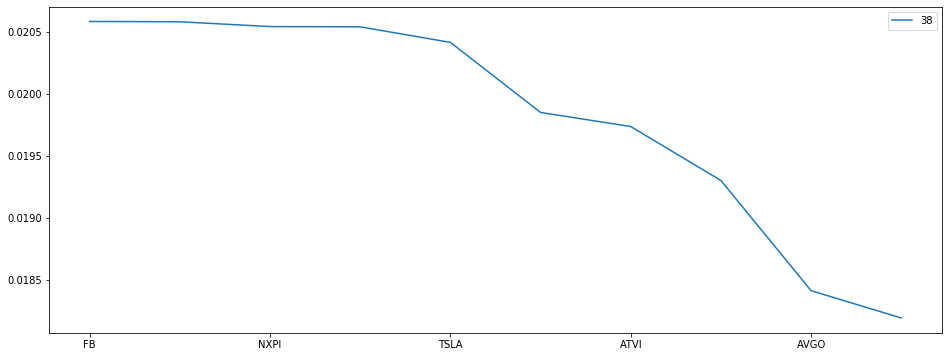

In [41]:
top10.plot(figsize = (16,6))

In [42]:
top10_tickers = list(top10.index)

In [43]:
top_10_returns = nas_returns[top10_tickers]

In [44]:
top_10_returns

FB      AMGN      NXPI      WDAY      TSLA      ORLY  \
Date                                                                     
2020-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-03 -0.005291 -0.006789 -0.009647  0.005852  0.029633  0.002811   
2020-01-06  0.018834  0.007674 -0.007070  0.006234  0.019255 -0.009322   
2020-01-07  0.002164 -0.009405  0.012975  0.020414  0.038801 -0.013551   
2020-01-08  0.010138  0.000756  0.002499  0.033304  0.049205  0.007300   
...              ...       ...       ...       ...       ...       ...   
2020-08-27 -0.035175  0.010512 -0.011605  0.014090  0.039746 -0.000259   
2020-08-28  0.001501  0.001226  0.009361  0.125791 -0.011323  0.000800   
2020-08-31 -0.001566  0.000790 -0.011554 -0.017099  0.125689  0.005789   
2020-09-01  0.007640 -0.009711  0.019402  0.008510 -0.046697  0.016258   
2020-09-02  0.023897  0.028940  0.030421 -0.034209 -0.058268  0.019907   

                ATVI      SBUX      AVGO      CERN  
Date                                                
2020-01-02       NaN       NaN       NaN       NaN  
2020-01-03  0.000341 -0.005820 -0.025435  0.002853  
2020-01-06  0.018238 -0.007880 -0.001496  0.002167  
2020-01-07  0.010043 -0.003064 -0.003443 -0.013110  
2020-01-08 -0.007623  0.011609 -0.012474  0.005752  
...              ...       ...       ...       ...  
2020-08-27 -0.006866  0.012134 -0.001560  0.025914  
2020-08-28 -0.008224  0.019062  0.016748 -0.006008  
2020-08-31  0.003725 -0.006235  0.006757  0.007830  
2020-09-01 -0.002275  0.018705  0.035691 -0.012267  
2020-09-02  0.001440  0.026729  0.043027  0.038085  

[170 rows x 10 columns]

In [45]:
n_port = 2000
all_w = np.zeros((n_port, len(top10_tickers)))
all_s = np.zeros(n_port)
all_v = np.zeros(n_port)
all_r = np.zeros(n_port)

for index in range(n_port):
    weii = np.array(np.random.random(len(top10_tickers)))
    weii = weii/weii.sum()
    all_w[index,:] = weii
    
    all_r[index] = np.sum(top_10_returns.mean() * weii * 252)
    all_v[index] = np.sqrt(np.dot(weii.T, np.dot(top_10_returns.cov() * 252, weii)))
    all_s[index] = all_r[index]/all_v[index]

### Analysis of portfolio
- Max Ret
- Max Sharp 
- Lowest Vol 
- Targeting Highest Return

In [46]:
max_ret = all_r.argmax()

In [47]:
max_shp = all_s.argmax()

In [48]:
lowest_v = all_v.argmin()

Text(0.5, 1.0, 'Nasdaq Portfolio Optimized for Maximum Return- \n 10 compaines by weight')

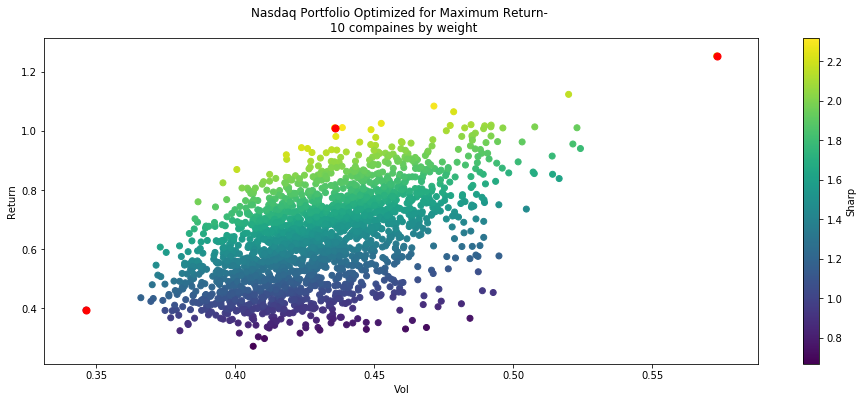

In [49]:
plt.figure(figsize=(16,6))
plt.scatter(all_v, all_r, c = all_s)
plt.colorbar(label = "Sharp")
plt.scatter(all_v[max_ret], all_r[max_ret], c = "r", s = 50)
plt.scatter(all_v[lowest_v], all_r[lowest_v], c = "r", s = 50)
plt.scatter(all_v[max_shp], all_r[max_shp], c = "r", s = 50)
plt.ylabel("Return")
plt.xlabel("Vol")
plt.title("Nasdaq Portfolio Optimized for Maximum Return- \n 10 compaines by weight")

In [50]:
top_weights = pd.DataFrame(all_w, columns=top10_tickers)   

In [51]:
top_retruns = pd.DataFrame(all_r, columns=["returns"])

In [52]:
top_vol = pd.DataFrame(all_v, columns=["vol"])

In [53]:
top_sharp= pd.DataFrame(all_s, columns=["shp"])

In [54]:
top_frontier = pd.concat([top_retruns,top_sharp, top_vol, top_weights], axis=1)

In [55]:
top_frontier

returns       shp       vol        FB      AMGN      NXPI      WDAY  \
0     0.527548  1.245055  0.423715  0.108352  0.082348  0.146213  0.027098   
1     0.504052  1.211456  0.416071  0.165065  0.157112  0.162325  0.172848   
2     0.359592  0.837882  0.429168  0.096397  0.225260  0.134054  0.045555   
3     0.731510  1.576270  0.464077  0.135689  0.123696  0.046743  0.161428   
4     0.648074  1.560615  0.415268  0.187946  0.141934  0.130028  0.039293   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.934572  2.077318  0.449894  0.153127  0.083789  0.014731  0.055241   
1996  0.391836  0.947607  0.413500  0.104425  0.087472  0.149022  0.085141   
1997  0.511730  1.272555  0.402128  0.145546  0.113078  0.073344  0.084039   
1998  0.671362  1.494995  0.449073  0.060133  0.034125  0.132551  0.175811   
1999  0.503636  1.151952  0.437202  0.075492  0.034138  0.128412  0.039582   

          TSLA      ORLY      ATVI      SBUX      AVGO      CERN  
0     0.060149  0.125121  0.156432  0.140059  0.089373  0.064855  
1     0.021345  0.021022  0.168520  0.109341  0.011012  0.011411  
2     0.019155  0.129936  0.008567  0.186848  0.098401  0.055828  
3     0.125734  0.046910  0.017144  0.165304  0.174957  0.002394  
4     0.100469  0.125265  0.121600  0.087903  0.006495  0.059066  
...        ...       ...       ...       ...       ...       ...  
1995  0.201984  0.028046  0.173037  0.192812  0.083564  0.013668  
1996  0.012331  0.175408  0.064381  0.028707  0.126173  0.166939  
1997  0.048214  0.167014  0.121758  0.115111  0.054928  0.076969  
1998  0.095651  0.147409  0.135593  0.080610  0.112501  0.025616  
1999  0.044067  0.008418  0.185349  0.165620  0.222661  0.096261  

[2000 rows x 13 columns]

## Max return Portfolio by weight

In [56]:
top_frontier[top_frontier["returns"] == all_r.max()]

returns       shp       vol        FB    AMGN      NXPI      WDAY  \
416  1.253098  2.186665  0.573063  0.076899  0.0258  0.279218  0.067673   

         TSLA      ORLY      ATVI      SBUX      AVGO      CERN  
416  0.339405  0.034699  0.056569  0.036278  0.054524  0.028935

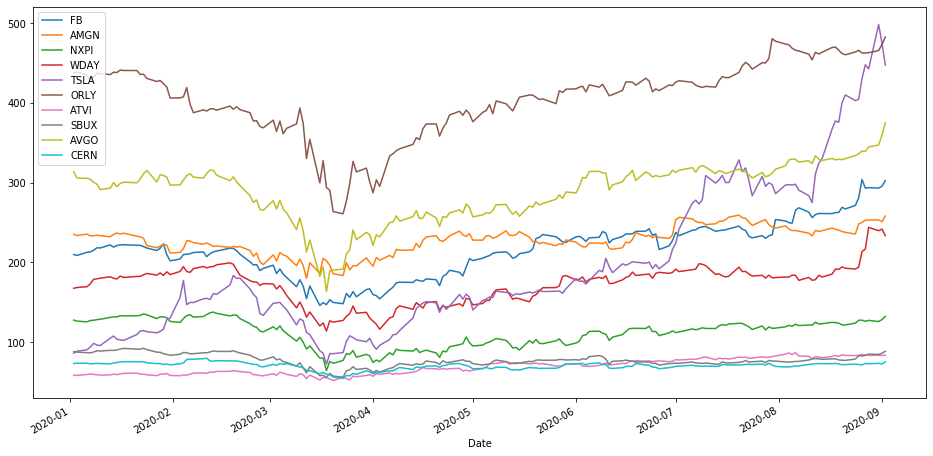

In [57]:
nasdaq_adj_Close[top10_tickers].plot(figsize = (16,8))

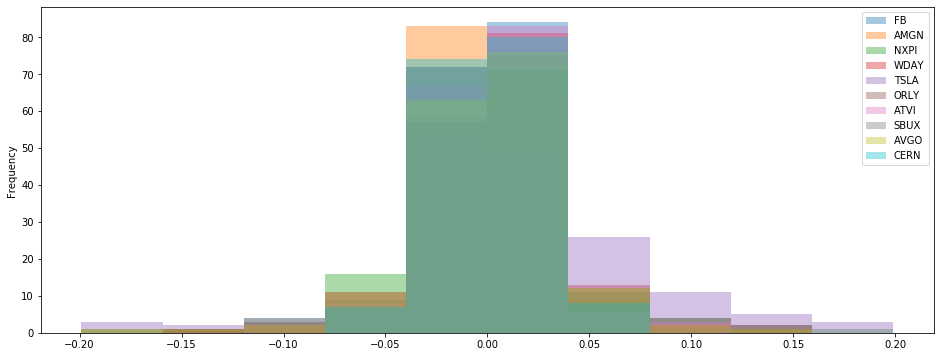

In [58]:
nas_returns[top10_tickers].plot(figsize =(16,6), kind = "hist",alpha = 0.4)

## Below we will take a look at precovid